# Joseph Aytch 3.2 Exercise DSC320-T301 Math for Data Science (2243-1) 

In [41]:
import os
os.chdir('D:/JupyterDocs')

In [42]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [43]:
# Import a dataset
df = pd.read_csv(r"D:\Bellevue Class documents\DSC 320 Math for Data Science\week3data\week3data\us_pop_data.csv")
df

,year,us_pop
0,1790,3929326
1,1800,5308483
2,1810,7239881
3,1820,9638453
4,1830,12866020
5,1840,17069453
6,1850,23191876
7,1860,31443321
8,1870,39818449
9,1880,50189209


## Import the data and create two new columns. Create one column that is the number of years since 1790. Create another column that is the population in millions.

In [44]:
# Create a new column for the number of years since 1790
df['Years_Since_1790'] = df['year'] - 1790

# Create another column for population in millions
df['Population_Millions'] = df['us_pop'] / 1000000

In [45]:
df.head()

,year,us_pop,Years_Since_1790,Population_Millions
0,1790,3929326,0,3.929326
1,1800,5308483,10,5.308483
2,1810,7239881,20,7.239881
3,1820,9638453,30,9.638453
4,1830,12866020,40,12.866020


## Plot the US population (in millions) versus the years since 1790

In [46]:
x = df['Years_Since_1790']
y = df['Population_Millions']

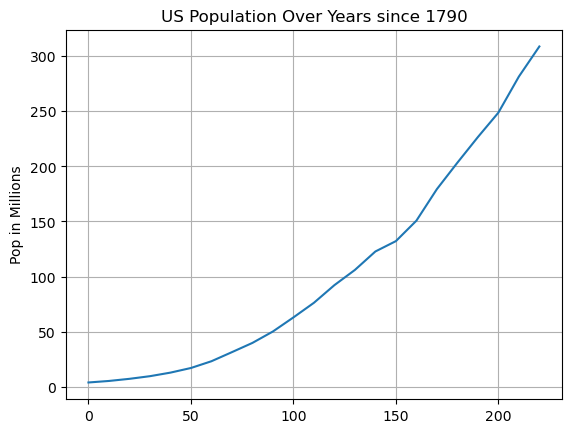

In [47]:
# Plotting
plt.plot(x, y)
plt.title('US Population Over Years since 1790')
plt.ylabel('Pop in Millions')
plt.grid(True)
plt.show()

##  Create a linear regression model to predict the US population (in millions) t years from 1790. Find and report the R2-value of this model.

In [48]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression


In [49]:
# Change data to array so it can be used
mx = x.to_numpy().reshape(-1, 1)
my = y.to_numpy().reshape(-1, 1)

In [50]:
# Create Model
model = LinearRegression()
model.fit(mx,my)

LinearRegression()

In [51]:
# Make predictions
y_pred = model.predict(mx)

In [52]:
# sklearn already has an r2 metric so we'll just use that
from sklearn.metrics import r2_score

In [53]:
# Compare predictions to actual values
r2_score(my, y_pred)

0.9192437447080442

## Create another new column in your data by squaring the number of years since 1790.

In [54]:
# Create a new column by squaring the number of years since 1790
df['Years_Since_1790_Squared'] = np.square(df['Years_Since_1790'])

In [55]:
df.head()

,year,us_pop,Years_Since_1790,Population_Millions,Years_Since_1790_Squared
0,1790,3929326,0,3.929326,0
1,1800,5308483,10,5.308483,100
2,1810,7239881,20,7.239881,400
3,1820,9638453,30,9.638453,900
4,1830,12866020,40,12.866020,1600


## Run another linear regression, where your input feature is the square of the number of years since 1790. Find and report the R2-value of this model.

In [56]:
# Prepare the new input feature
mx2 = df['Years_Since_1790_Squared'].to_numpy().reshape(-1, 1)


In [57]:
model.fit(mx2,my)

LinearRegression()

In [58]:
# Make predictions
y_pred2 = model.predict(mx2)

In [59]:
# Compare predictions to actual values
r2_score(my, y_pred2)

0.9984915694986646

## Plot the models you built on top of the data. Which one fits the data better? Is this apparent in your R2-values. Explain

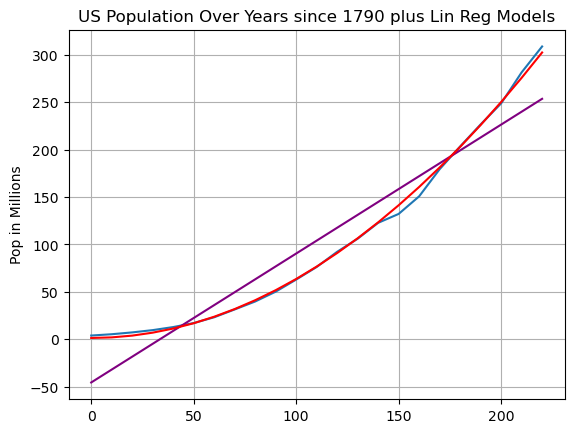

In [60]:
# Plotting
plt.plot(x, y)
plt.plot(x, y_pred, color='purple')
plt.plot(x, y_pred2, color='red',)
plt.title('US Population Over Years since 1790 plus Lin Reg Models')
plt.ylabel('Pop in Millions')
plt.grid(True)
plt.show()

### The second model ended up being more accurate as it seemed to better take into account the exponential growth of the population over time. This is accurately portrayed by the graph more closely resembling the original graph and the fact that the 2nd model had a higher r2 value meaning it was more closely accurate with its predictions. 

# Customer Spending Data
For this problem, you will be using the data set customer spending.csv. This data set is modified
version of the data from https://archive.ics.uci.edu/ml/datasets/Wholesale+customers.

In [61]:
# Import a dataset
df2 = pd.read_csv(r"D:\Bellevue Class documents\DSC 320 Math for Data Science\week3data\week3data\customer_spending.csv")
df2

,ann_spending
0,34112
1,33266
2,36610
3,27381
4,46100
...,...
435,73302
436,48372
437,77407
438,17834


### Make a histogram of the customer spending amounts.

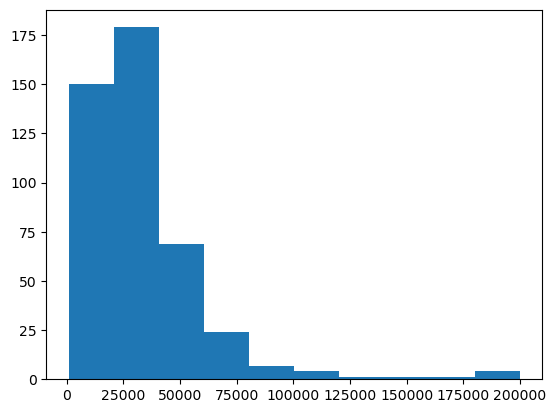

In [62]:
plt.hist(df2)
plt.show()

### Make a new data set that is a log transformation of the customer spending amounts.

In [63]:
df2['ann_spending_log'] = np.log(df2['ann_spending'])

In [64]:
df2.head()

,ann_spending,ann_spending_log
0,34112,10.437405
1,33266,10.412291
2,36610,10.508077
3,27381,10.217605
4,46100,10.738568


### Make a histogram of the log transformed dataset.

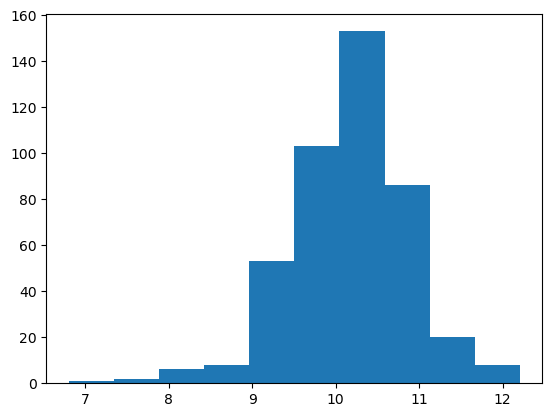

In [66]:
plt.hist(df2['ann_spending_log'])
plt.show()

### Compare the two histograms. Discuss why it might be useful to apply a log transformation to this data for modeling purposes.

One reason is to fix a skewed dataset. The first histogram is skewed heavily to the right, the 2nd looks more normally distributed while still having differential values.  

Another related reason is to normalize outliers. The outliers can be left in the dataset without skewing the data too much when it is transformed with log. We can now still see the outling datasest without them being too far away from the other data.